# Base Case Analysis
This file produces the analyses for the base case. It imports the csv from output_data that is produced in BaseCase.ipynb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#This block imports the csv file from the right directory
base_case_file_path = r'../output_data/BaseCase.csv'
base_case = pd.read_csv(base_case_file_path)
base_case

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,9,1000,80,100yr,watts_strogatz,256,1.968749e+07,2.106260e+07,...,49143.734573,2.478339,0.638023,0.563509,11772.545491,17555.058685,45585.218789,2.299236,0.599912,0.522705
1,3,3,37,1000,80,100yr,watts_strogatz,271,2.027182e+07,2.159540e+07,...,54711.189204,1.634004,0.705592,0.634994,7771.917416,19545.890022,51241.347066,1.519817,0.664090,0.594722
2,2,2,50,1000,80,100yr,watts_strogatz,326,1.575358e+07,1.694973e+07,...,42891.841205,1.541345,0.554855,0.491641,7450.896938,15206.612400,39121.710447,1.456731,0.518517,0.448427
3,1,1,52,1000,80,100yr,watts_strogatz,313,1.295399e+07,1.407930e+07,...,30450.095699,1.463850,0.498766,0.345523,6932.312509,13276.388011,28190.990918,1.352466,0.457738,0.319888
4,4,4,32,1000,80,100yr,watts_strogatz,366,1.216807e+07,1.299802e+07,...,25072.860247,1.261634,0.481871,0.291235,5695.988559,12926.781548,23561.288246,1.131182,0.454050,0.273678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,95,24,1000,80,100yr,watts_strogatz,300,1.806948e+07,1.934977e+07,...,51492.649690,2.056374,0.580322,0.604483,9852.647780,15914.686250,47935.772748,1.944915,0.541163,0.562728
96,96,96,25,1000,80,100yr,watts_strogatz,286,1.291937e+07,1.406930e+07,...,30605.510756,1.447214,0.481541,0.344594,6715.395156,12980.906683,27918.572076,1.332210,0.442963,0.314341
97,97,97,28,1000,80,100yr,watts_strogatz,317,1.369099e+07,1.459819e+07,...,16453.260995,1.986361,0.558212,0.186888,9324.899012,15157.268265,15567.544076,1.881710,0.521409,0.176827
98,98,98,55,1000,80,100yr,watts_strogatz,302,1.424987e+07,1.512218e+07,...,36865.758705,1.601824,0.482534,0.417229,7746.848802,13222.246810,35108.062686,1.515901,0.452030,0.397336


Text(0.5, 1.0, 'Average Damage to Average Income ratio for different income labels')

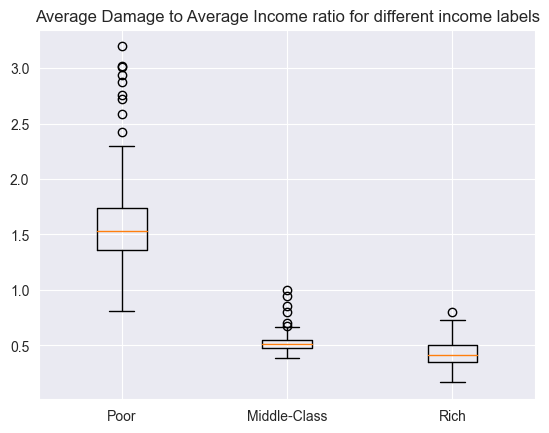

In [40]:
#This block creates a box plot from certain columns from the imported dataframe 
#It aims to display the average income to damage ratio per income class, which is one of the unpacked columns from before
boxplot_base_case_ratio = plt.boxplot([base_case['AverageIncomeToDamagePoorHousehold'], base_case['AverageIncomeToDamageMiddleClassHousehold'], base_case['AverageIncomeToDamageRichHousehold']], 
            labels=['Poor', 'Middle-Class', 'Rich'])

plt.title('Average Damage to Average Income ratio for different income labels') #Give it a necessary title


Text(0.5, 1.0, 'Average Damage per agent for each income label')

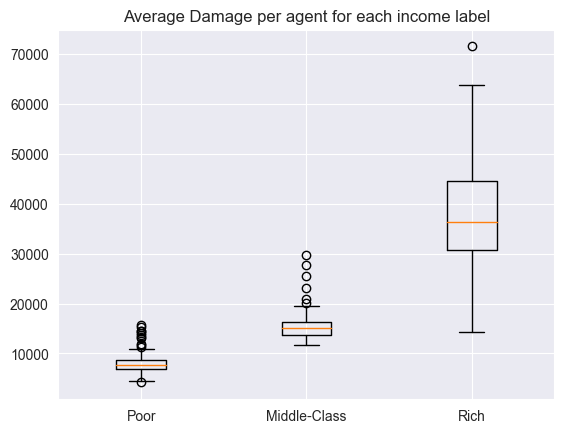

In [41]:
#This block creates a box plot from certain columns from the imported dataframe 
#It aims to display the average damage per household per income class, which is one of the unpacked columns from before
boxplot_base_case_average_per_label = plt.boxplot([base_case['AverageDamagePerPoorHousehold'], base_case['AverageDamagePerMiddleClassHousehold'], base_case['AverageDamagePerRichHousehold']], 
            labels=['Poor', 'Middle-Class', 'Rich'])
plt.title('Average Damage per agent for each income label') #Give it a necessary title

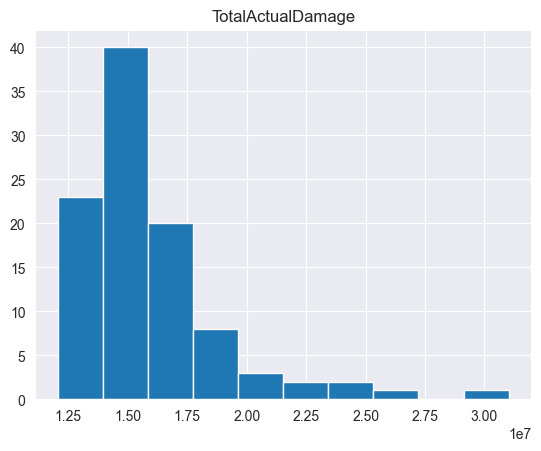

In [42]:
#A histogram is produced to display the distribution of the TotalActualDamage per model iteration for the base case
histogram_actual_damage = base_case.hist('TotalActualDamage')

    RunId  iteration  Step  number_of_households  number_of_steps  \
0       0          0     9                  1000               80   
1       3          3    37                  1000               80   
2       2          2    50                  1000               80   
3       1          1    52                  1000               80   
4       4          4    32                  1000               80   
..    ...        ...   ...                   ...              ...   
95     95         95    24                  1000               80   
96     96         96    25                  1000               80   
97     97         97    28                  1000               80   
98     98         98    55                  1000               80   
99     99         99    51                  1000               80   

   flood_map_choice         network  TotalAdaptedHouseholds  \
0             100yr  watts_strogatz                     256   
1             100yr  watts_strogatz          

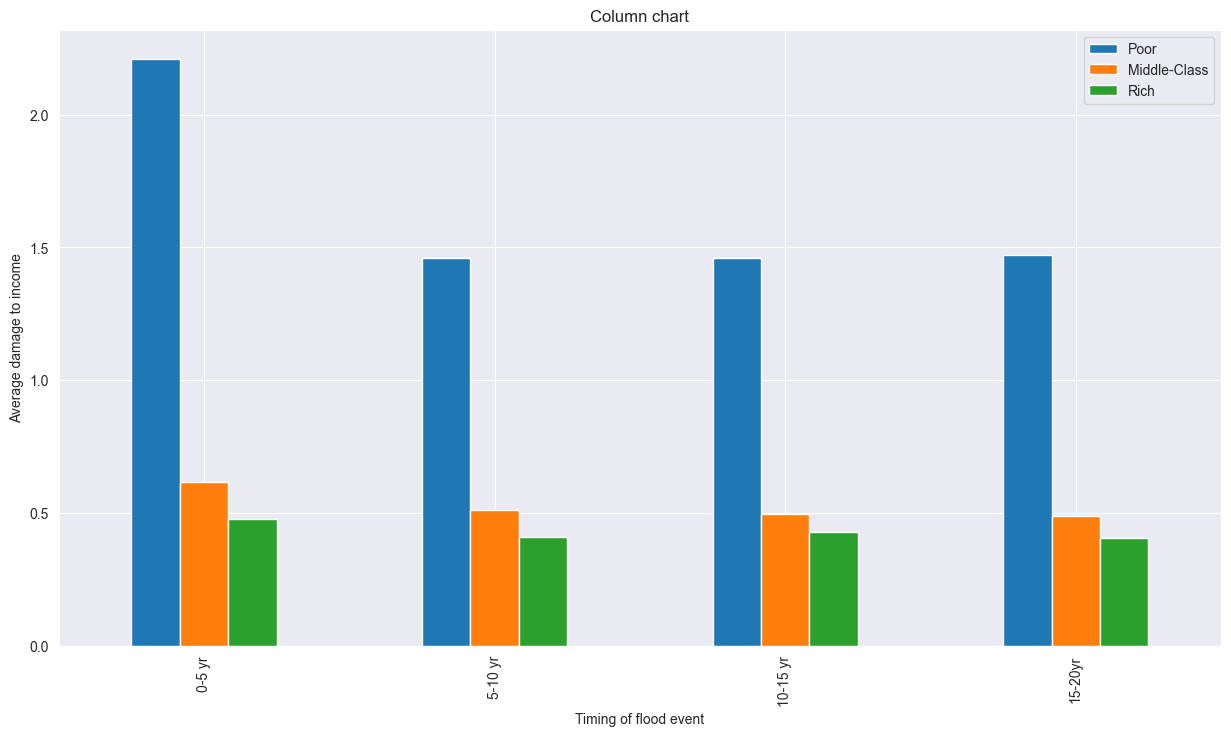

In [43]:
#Define a DataFrame with the right columns from the imported dataframe and label them accordingly
plotdata = pd.DataFrame({

    "Poor":base_case['AverageIncomeToDamagePoorHousehold'],

    "Middle-Class":base_case['AverageIncomeToDamageMiddleClassHousehold'],

    "Rich":base_case['AverageIncomeToDamageRichHousehold']})

# Define the intervals for clustering and provide labeling
intervals = [0, 20, 40, 60, 80]
custom_labels = ['0-5 yr', '5-10 yr', '10-15 yr', '15-20yr']

# Create a new column representing the clusters
base_case['Cluster'] = pd.cut(base_case['Step'], bins=intervals, labels=custom_labels)

# Create the plotdata DataFrame - we have not used this, because afterwards we chose for boxplots. But it was a way to experiment with the data.
plotdata = pd.DataFrame({
    "Poor": base_case.groupby('Cluster')['AverageIncomeToDamagePoorHousehold'].mean(),
    "Middle-Class": base_case.groupby('Cluster')['AverageIncomeToDamageMiddleClassHousehold'].mean(),
    "Rich": base_case.groupby('Cluster')['AverageIncomeToDamageRichHousehold'].mean()
})

# Display the result
print(base_case)
plotdata.plot(kind="bar", figsize=(15, 8))

#Add information to the plot with labels and a title
plt.title("Column chart")
plt.xlabel("Timing of flood event")
plt.ylabel("Average damage to income")

plt.show()

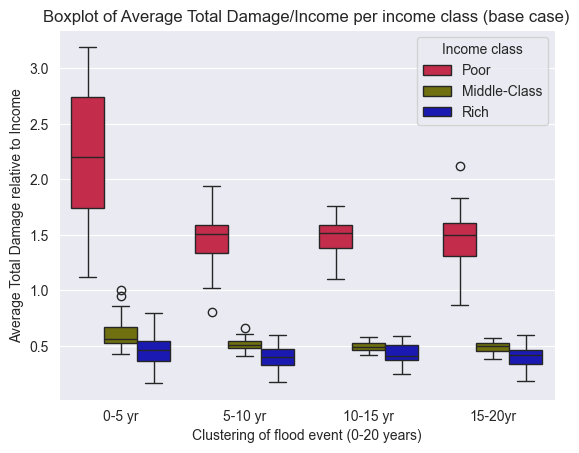

In [44]:
import seaborn as sns

#Gather the necessary data from the initial dataframe and the newly added column 'Cluster'
data = pd.DataFrame({
    'Flood event': base_case['Cluster'],
    'Poor': base_case['AverageIncomeToDamagePoorHousehold'],
    'Middle-Class': base_case['AverageIncomeToDamageMiddleClassHousehold'],
    'Rich': base_case['AverageIncomeToDamageRichHousehold']
})

# Reshape the DataFrame to long format
melted_data = pd.melt(data, id_vars=['Flood event'], var_name='Income class', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted_data['Flood event'], y=melted_data['total_damage'], hue=melted_data['Income class'], palette=["crimson","olive","mediumblue"])

#Add information to the plot with labels and a title
plt.title('Boxplot of Average Total Damage/Income per income class (base case)')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage relative to Income')

#Save the boxplot as png in the fil directory 'result_figures'
output_path_basecase = r'../result_figures/Boxplot_BaseCase.png'
plt.savefig(output_path_basecase)
plt.show()

